In [36]:
#import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [37]:
# Loading dataset
df= pd.read_excel('final.xlsx')
df.head()

,Date,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Interest rate
0,2003-09-12,NaN,NaN,714319.05,4.478129e+09,3.590024e+09,-7.966293e+07,2741964000,2.86,84.145,NaN
1,2004-09-12,NaN,28894.0,754184.14,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,84.320,NaN
2,2004-11-02,NaN,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.210,NaN
3,2004-11-03,NaN,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.210,NaN
4,2004-11-04,NaN,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.145,NaN


## DATA UNDERSTANDING

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Date                                           4808 non-null   datetime64[ns]
 1   12-Month Inflation(%)                          4765 non-null   float64       
 2   Total Remittances                              4807 non-null   float64       
 3   Total Debt                                     4315 non-null   float64       
 4   Imports                                        4808 non-null   float64       
 5   Exports                                        4808 non-null   float64       
 6   Foreign direct investment                      4808 non-null   float64       
 7   IBRD loans and IDA credits (DOD, current US$)  4808 non-null   int64         
 8   Unemployment Rate                              4808 non-nu

In [39]:
df.tail

<bound method NDFrame.tail of            Date  12-Month Inflation(%)  Total Remittances   Total Debt  \
0    2003-09-12                    NaN                 NaN   714319.05   
1    2004-09-12                    NaN            28894.00   754184.14   
2    2004-11-02                    NaN            25473.00   757208.33   
3    2004-11-03                    NaN            25473.00   757208.33   
4    2004-11-04                    NaN            25473.00   757208.33   
...         ...                    ...                 ...         ...   
4803 2023-12-21                   6.63           372569.94         NaN   
4804 2023-12-22                   6.63           372569.94         NaN   
4805 2023-12-27                   6.63           372569.94         NaN   
4806 2023-12-28                   6.63           372569.94         NaN   
4807 2023-12-29                   6.63           372569.94         NaN   

          Imports       Exports   Foreign direct investment  \
0     4.478129e+09

In [40]:
df.shape

(4808, 11)

In [41]:
# checking the number of missing value
df.isnull().sum()

Date                                               0
12-Month Inflation(%)                             43
Total Remittances                                  1
Total Debt                                       493
Imports                                            0
Exports                                            0
Foreign direct investment                          0
IBRD loans and IDA credits (DOD, current US$)      0
Unemployment Rate                                  0
exchange_rate                                      0
Interest rate                                    393
dtype: int64

In [42]:
df.describe()

,Date,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Interest rate
count,4808,4765.000000,4807.000000,4.315000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4808.000000,4808.000000,4415.000000
mean,2014-06-03 19:31:02.895174912,7.578008,146869.071546,2.859218e+06,1.658182e+10,9.911720e+09,-4.223557e+08,5.404333e+09,3.593977,93.008117,9.139241
min,2003-09-12 00:00:00,1.850000,25473.000000,7.143191e+05,4.478129e+09,3.590024e+09,-1.364485e+09,2.663224e+09,2.650000,61.510000,5.750000
25%,2009-09-09 18:00:00,5.000000,53350.830000,9.935318e+05,1.252904e+10,8.138888e+09,-7.709787e+08,3.156096e+09,2.740000,78.082500,7.500000
50%,2014-06-18 12:00:00,6.450000,116064.370000,1.907036e+06,1.771164e+10,1.044871e+10,-3.526285e+08,4.199127e+09,2.770000,89.947500,8.750000
75%,2019-03-05 06:00:00,8.390000,221925.970000,4.483034e+06,2.027930e+10,1.147124e+10,-5.181906e+07,7.124964e+09,5.010000,103.270000,10.000000
max,2023-12-29 00:00:00,19.720000,378053.010000,8.206740e+06,2.460558e+10,1.395358e+10,3.871569e+08,1.246476e+10,5.810000,156.460000,18.000000
std,NaN,3.954996,103813.938541,2.201235e+06,4.853160e+09,2.226006e+09,4.936221e+08,2.991347e+09,1.230436,18.221024,2.398977


## HANDLING MISSING VALUES

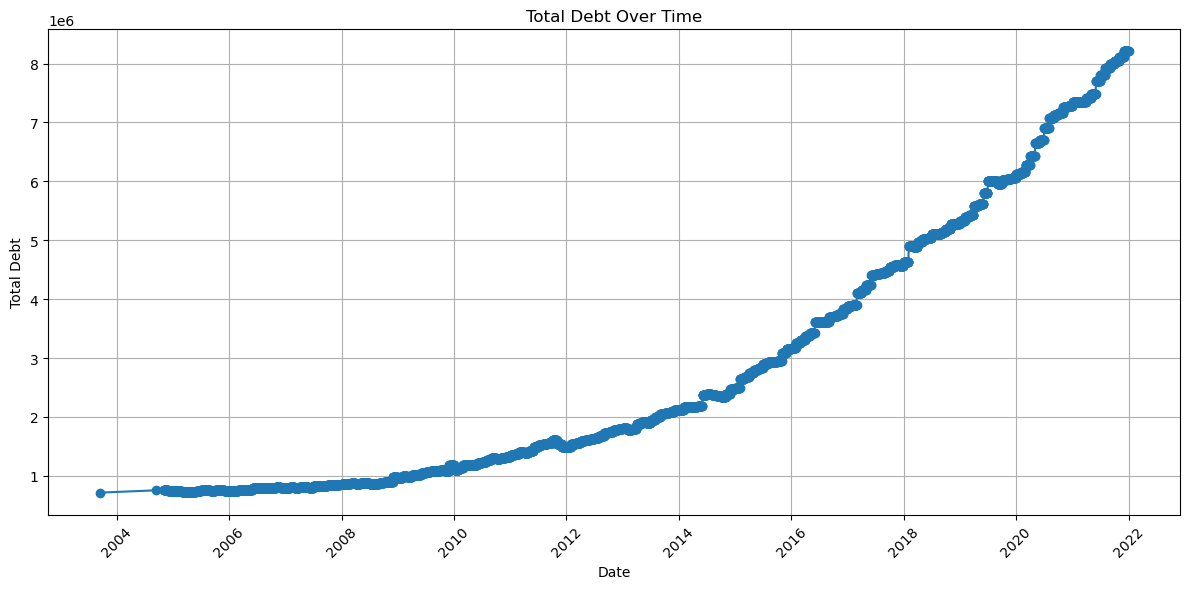

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total Debt'], marker='o', linestyle='-')
plt.title('Total Debt Over Time')
plt.xlabel('Date')
plt.ylabel('Total Debt')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
df['Total Debt'] = df['Total Debt'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_18892\3550152950.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total Debt'] = df['Total Debt'].interpolate(method='linear').fillna(method='ffill').fillna(method='bfill')


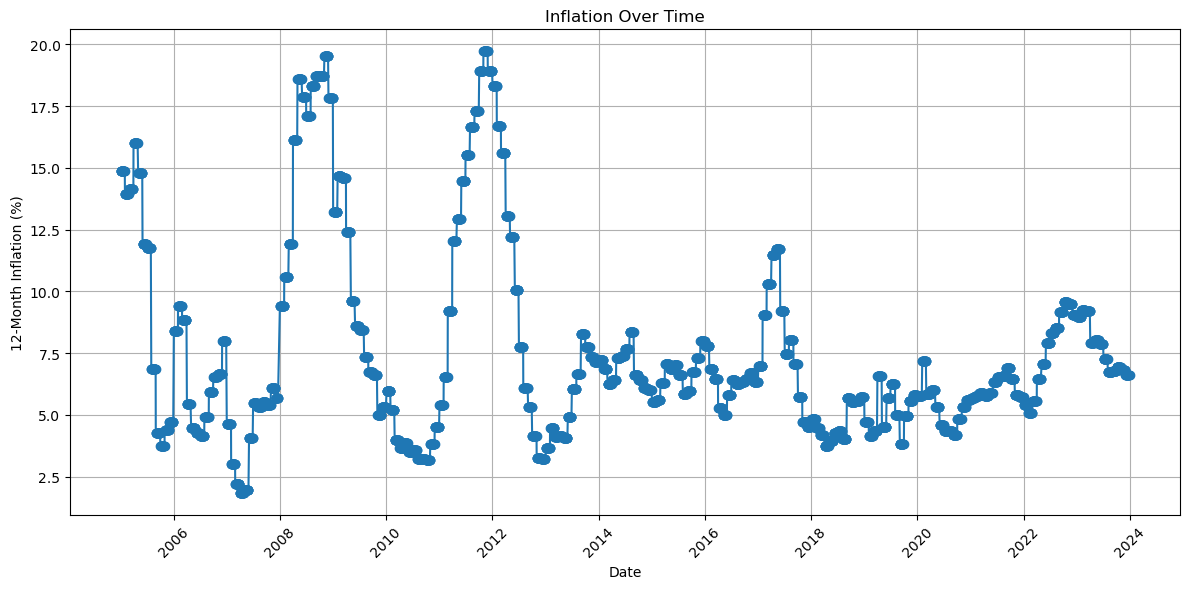

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['12-Month Inflation(%)'], marker='o', linestyle='-')
plt.title('Inflation Over Time')
plt.xlabel('Date')
plt.ylabel('12-Month Inflation (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
df['12-Month Inflation(%)'] = df['12-Month Inflation(%)'] \
    .interpolate(method='linear') \
    .fillna(method='ffill') \
    .fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_18892\3939139713.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill') \
C:\Users\user\AppData\Local\Temp\ipykernel_18892\3939139713.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


In [47]:
df.columns = df.columns.str.strip()
df['Total Remittances'] = df['Total Remittances'] \
    .interpolate(method='linear') \
    .fillna(method='ffill') \
    .fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_18892\2197080937.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill') \
C:\Users\user\AppData\Local\Temp\ipykernel_18892\2197080937.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='bfill')


In [48]:
df.isnull().sum()

Date                                               0
12-Month Inflation(%)                              0
Total Remittances                                  0
Total Debt                                         0
Imports                                            0
Exports                                            0
Foreign direct investment                          0
IBRD loans and IDA credits (DOD, current US$)      0
Unemployment Rate                                  0
exchange_rate                                      0
Interest rate                                    393
dtype: int64

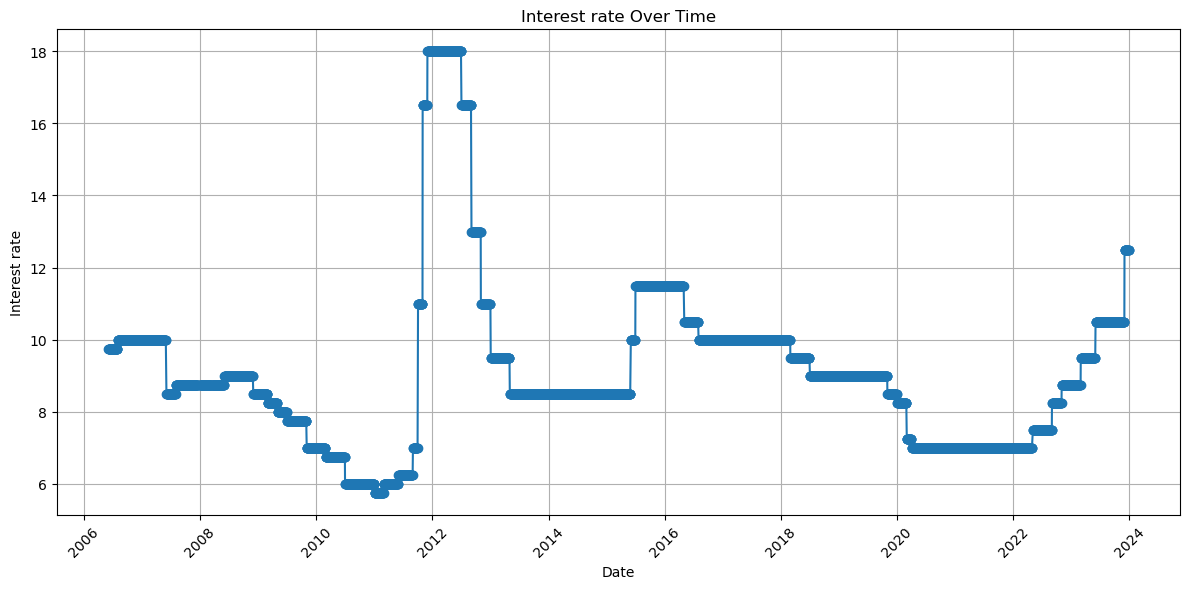

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Interest rate'], marker='o', linestyle='-')
plt.title('Interest rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df['Interest rate'] = df['Interest rate'].fillna(df['Interest rate'].median())

In [51]:
df.isnull().sum()

Date                                             0
12-Month Inflation(%)                            0
Total Remittances                                0
Total Debt                                       0
Imports                                          0
Exports                                          0
Foreign direct investment                        0
IBRD loans and IDA credits (DOD, current US$)    0
Unemployment Rate                                0
exchange_rate                                    0
Interest rate                                    0
dtype: int64

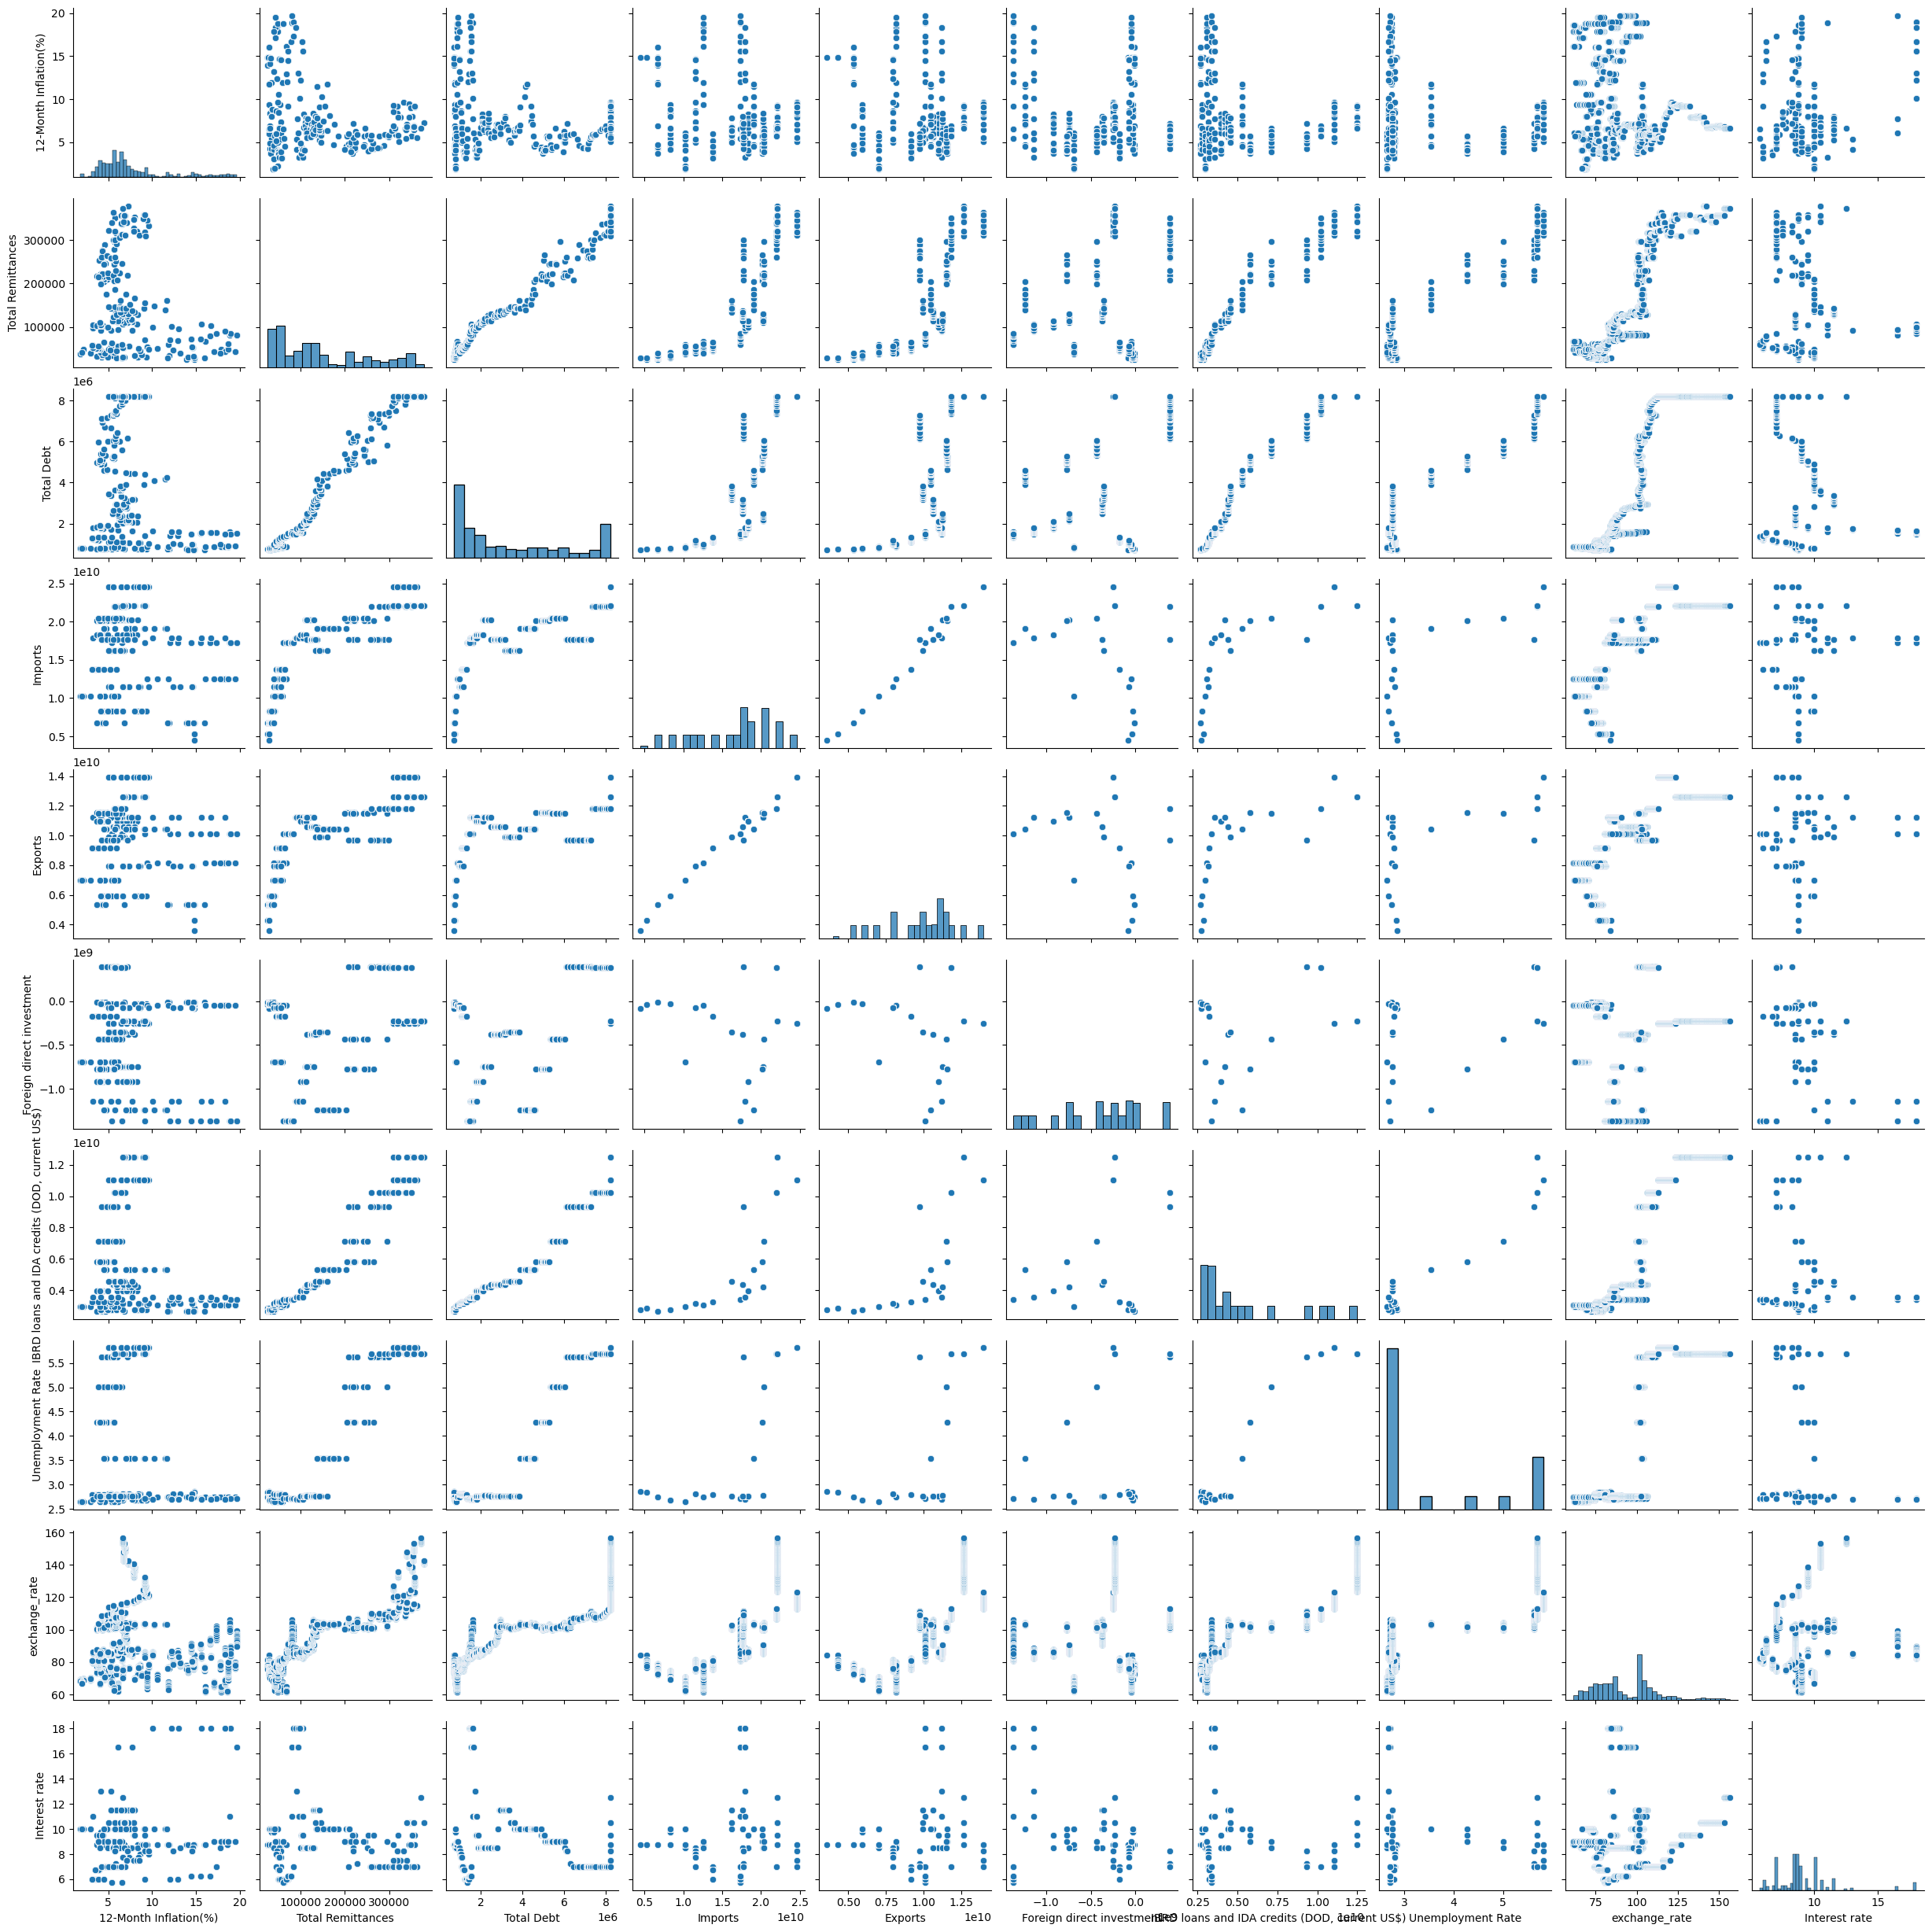

In [52]:
# ploting the correlation between the different columns
sns.pairplot(df)

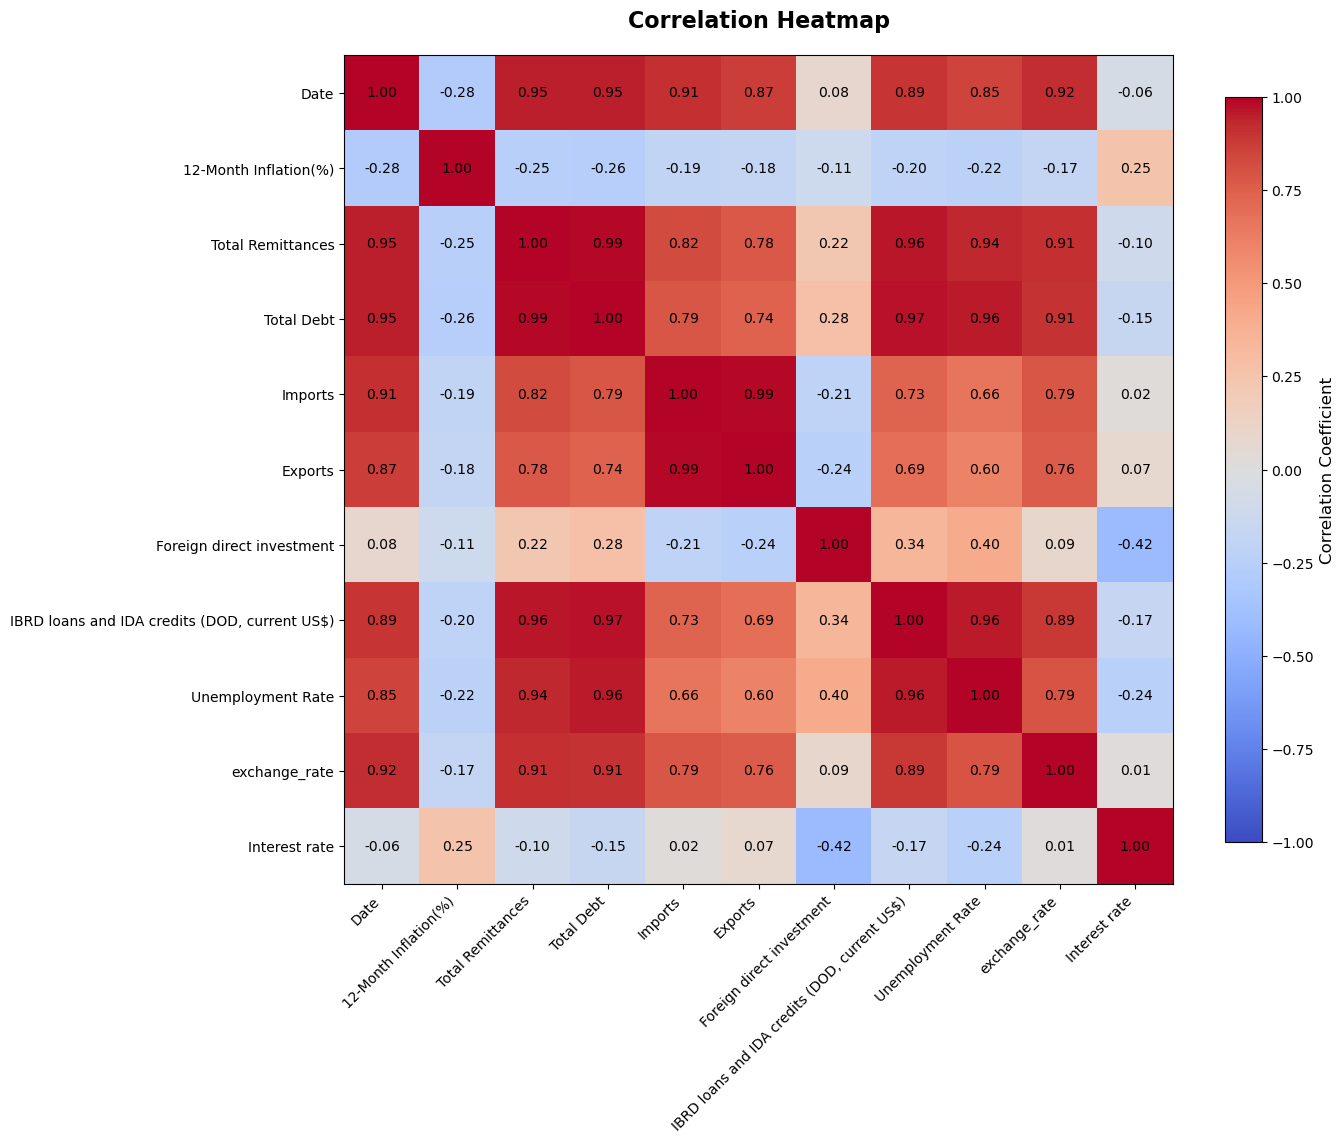

In [53]:
# Correlation Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(14, 12))
cax = ax.imshow(corr, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
cbar = fig.colorbar(cax, ax=ax, shrink=0.8)
cbar.set_label("Correlation Coefficient", fontsize=12)

# Set tick labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(corr.columns, fontsize=10)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')
ax.set_title("Correlation Heatmap", fontsize=16, weight='bold', pad=20)
plt.tight_layout()
plt.show()

conclusion:
The economy seems closely integrated: remittances, debt, loans, and unemployment all move together.

Inflation is inversely related to key financial flows like debt and remittances.
 FDI is discouraged by high interest rates  possibly due to tighter monetary policy.

Inflation doesn’t appear strongly correlated with most features, which suggests it's influenced by nonlinear or external factors.

## Visualization of the different features with Time

In [54]:
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)

In [55]:
df.head()

,12-Month Inflation(%),Total Remittances,Total Debt,Imports,Exports,Foreign direct investment,"IBRD loans and IDA credits (DOD, current US$)",Unemployment Rate,exchange_rate,Interest rate
Date,,,,,,,,,,
2003-09-12,14.87,28894.0,714319.05,4.478129e+09,3.590024e+09,-7.966293e+07,2741964000,2.86,84.145,8.75
2004-09-12,14.87,28894.0,754184.14,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,84.320,8.75
2004-11-02,14.87,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.210,8.75
2004-11-03,14.87,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.210,8.75
2004-11-04,14.87,25473.0,757208.33,5.290013e+09,4.283011e+09,-4.164783e+07,2882726000,2.84,81.145,8.75


## 12-Month Inflation(%)

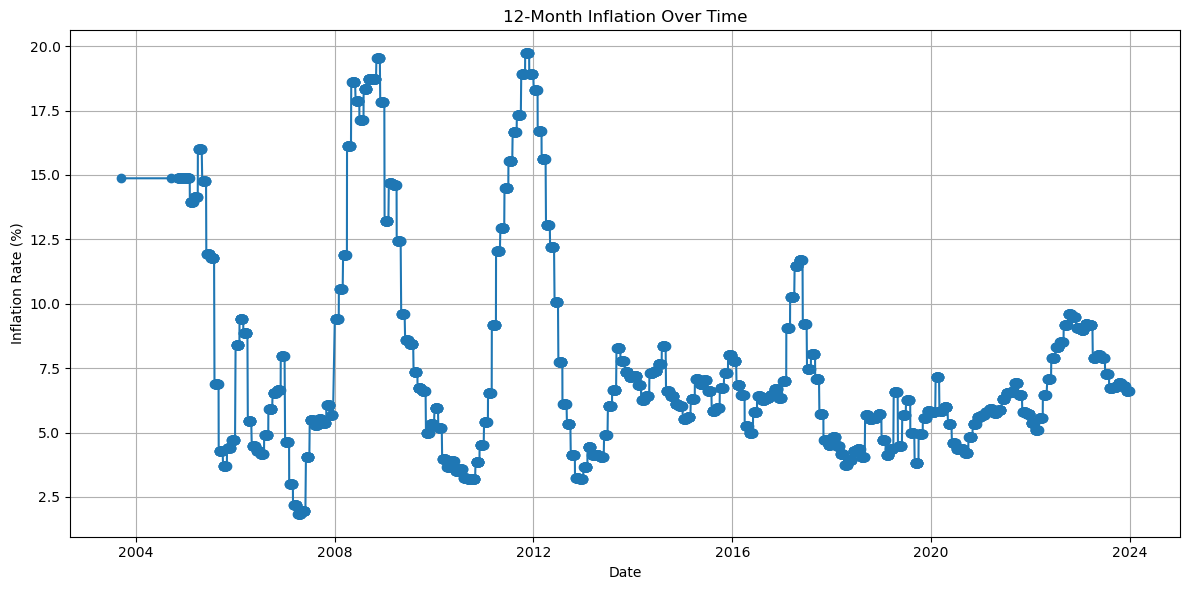

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['12-Month Inflation(%)'], marker='o', linestyle='-')
plt.title('12-Month Inflation Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

The 12-month inflation rate showed high volatility from 2003 to around 2012, with major spikes during 2008–2009 and 2011–2012 and this was caused by loose monetary policy. Inflation stabilized between 2013–2019, supported by better monetary policies, improved agriculture, and economic growth. In 2017 there was high spike caused by food shortages,high prices and election (https://assets.kpmg.com/content/dam/kpmg/za/pdf/2017/06/KPMG_Kenya_final.pdf?utm_source=chatgpt.com) 
Post-2020, inflation rose again due to COVID-19 disruptions, global conflicts, and rising import costs.Currency depreciation and growing public debt further intensified inflationary pressures after 2020.

## Total Remittances

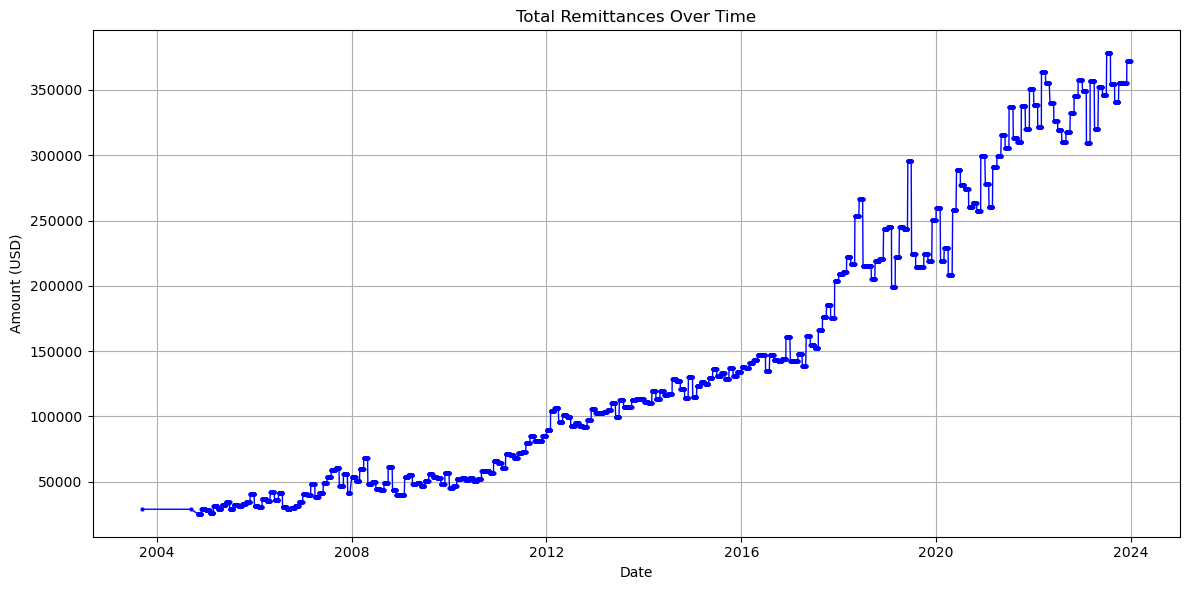

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Remittances'], marker='o', linestyle='-', color='blue', markersize=2, linewidth=1)
plt.title('Total Remittances Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

Total remittances to Kenya show a steady and significant upward trend from 2004 to 2024.
There was gradual growth until around 2017, followed by a sharper increase through the 2020s.
The surge post 2018 may reflect improved diaspora engagement, digital transfer channels, and economic resilience (https://kenya.iom.int/sites/g/files/tmzbdl926/files/documents/international-migration-from-kenya-undesa-2021dec01.pdf?utm_source=chatgpt.com) 
Despite short-term fluctuations, remittances consistently grew, reaching over $350,000 monthly by 2024.

## Total Debt

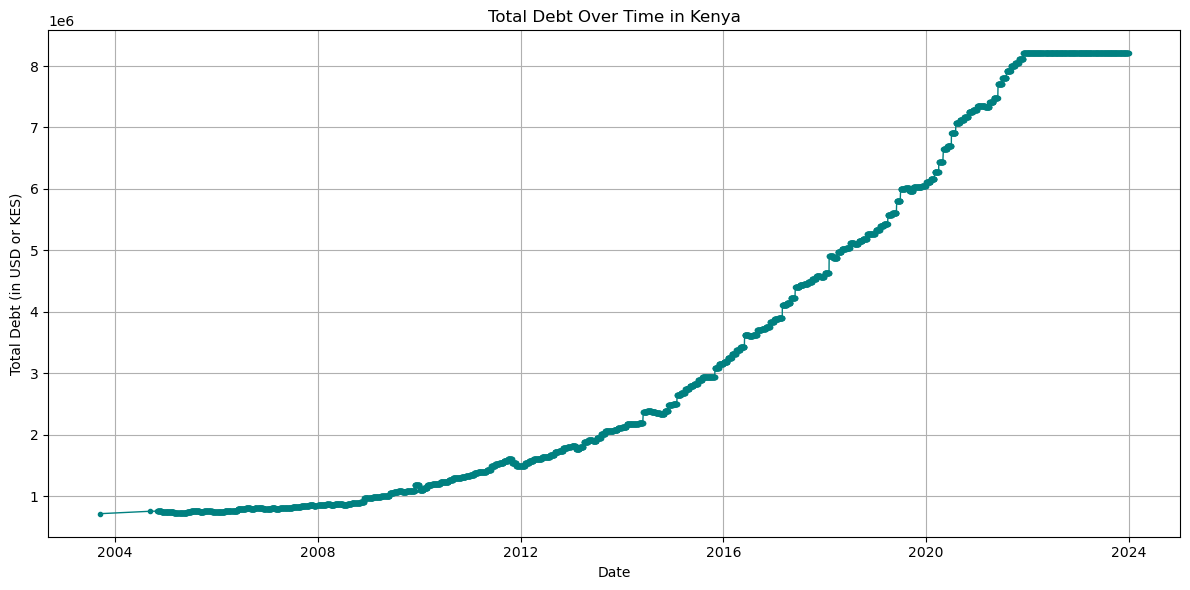

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total Debt'], marker='o', linestyle='-', color='teal', markersize=3, linewidth=1)
plt.title('Total Debt Over Time in Kenya')
plt.xlabel('Date')
plt.ylabel('Total Debt (in USD or KES)')
plt.grid(True)
plt.tight_layout()
plt.show()

Kenya’s debt grew steadily from 2003 to 2013, supporting Vision 2030 goals.
From 2014 to 2021, debt surged due to mega infrastructure projects and COVID-19 borrowing.
Growth slowed in 2022–2023, likely from debt ceilings and IMF-driven fiscal reforms.
This trajectory raises debt sustainability and external vulnerability concerns. (https://www.linkedin.com/pulse/escalating-kenyas-external-debt-levels-from-2002-2023-andrew-kubo-nqibf/)

## Import and Export

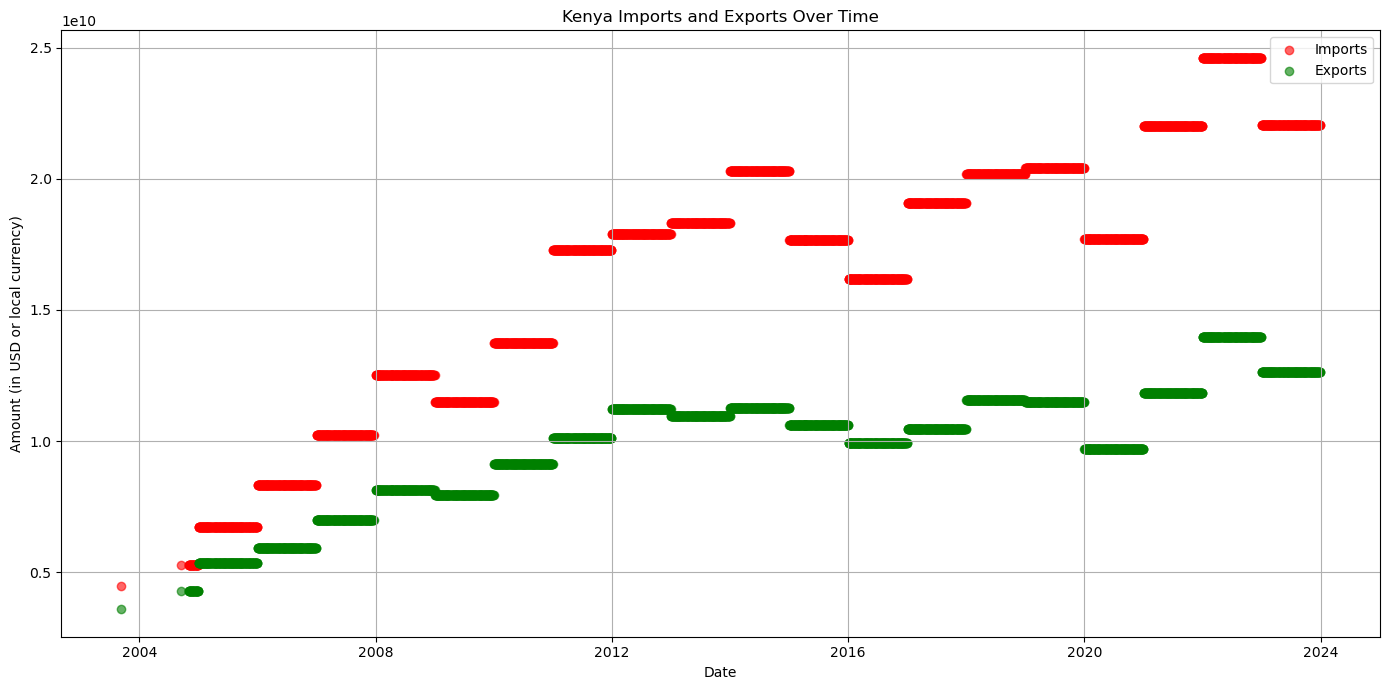

In [59]:
plt.figure(figsize=(14, 7))
plt.scatter(df.index, df['Imports'], color='red', label='Imports', alpha=0.6)
plt.scatter(df.index, df['Exports'], color='green', label='Exports', alpha=0.6)
plt.title('Kenya Imports and Exports Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (in USD or local currency)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Kenya’s imports have been steadily rising from 2003 to 2023, showing that the country is buying more goods and services from other countries.
In the past 10 years, the growth in imports has been especially fast, mainly because of big projects and the need for materials to support industries.
This continued increase in imports has made Kenya spend more than it earns from exports, leading to a trade deficit and showing its dependence on foreign markets.


Kenya’s exports have grown slowly from 2003 to 2023, but not as fast as imports.
Most of the exported goods are agricultural products like tea, coffee, and flowers.
While exports have increased over time, the growth has been limited due to challenges like global price fluctuations, limited industrial output, and market access issues.
Because exports are growing slower than imports, Kenya continues to face a trade imbalance, meaning it sells less abroad than it buys.

## Foreign direct investment

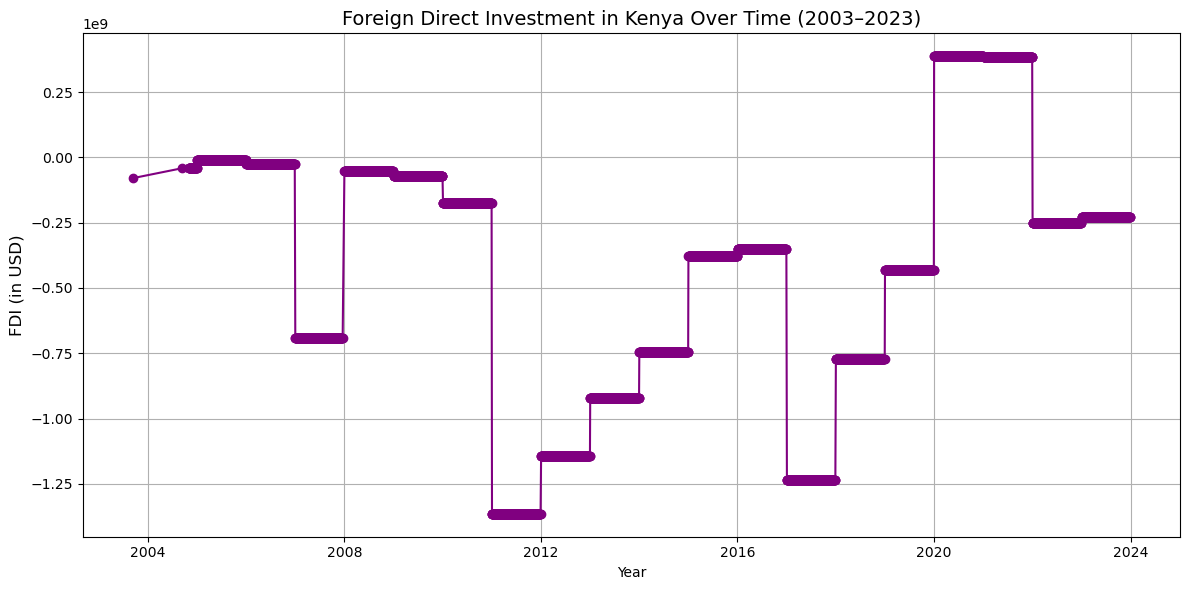

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Foreign direct investment'], marker='o', linestyle='-', color='purple')
plt.title('Foreign Direct Investment in Kenya Over Time (2003–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('FDI (in USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Foreign Direct Investment (FDI) in Kenya has gone up and down from 2003 to 2023.
There were big drops around 2011 and 2017,there was net disinvestment meaning investors pulled out money (https://www.ceicdata.com/en/kenya/balance-of-payments-capital-and-financial-account/ke-bop-financial-account-foreign-direct-investment-net).
FDI rose in 2020 but fell again later, showing unstable investment flow. this shows that Kenya should improve policies, ensure stability, and support investors to attract steady FDI.

## IBRD loans and IDA credits (DOD, current US$)

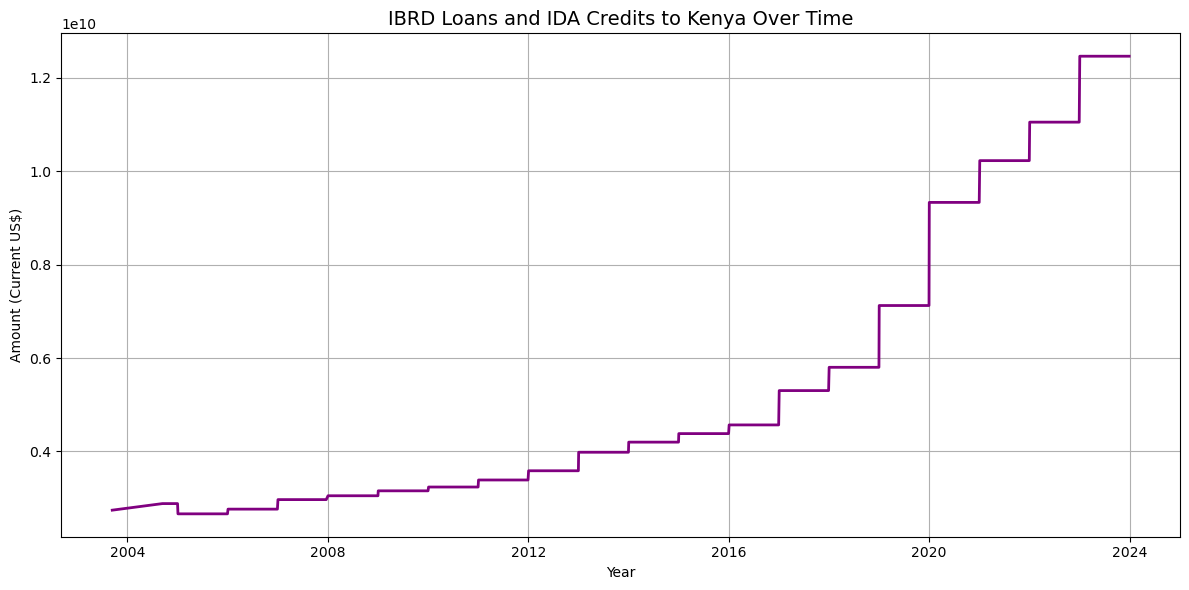

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['IBRD loans and IDA credits (DOD, current US$)'], color='purple', linewidth=2)
plt.title('IBRD Loans and IDA Credits to Kenya Over Time', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Amount (Current US$)')
plt.grid(True)
plt.tight_layout()
plt.show()

From this graph we can see that: 

Kenya borrowed more and more from the World Bank between 2003 and 2015, then borrowing grew much faster after 2016, especially after 2019.
By 2023, Kenya owed over $12 billion more than four times what it owed before.
This shows Kenya depends more on loans, likely for building projects and dealing with COVID-19.
It’s important for Kenya to manage its debt well, use the money for useful projects, and be open about how the money is spent.

## Unemployment Rate

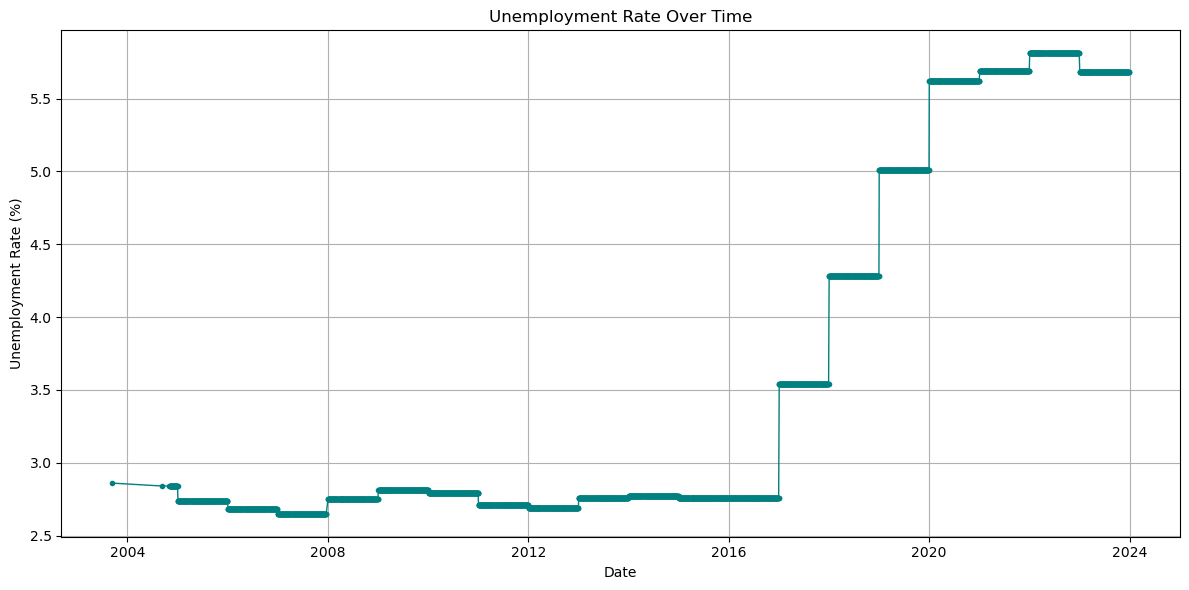

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Unemployment Rate'], marker='o', color='teal',markersize=3, linewidth=1)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

From 2003 to 2016, unemployment stayed low and steady.
Starting in 2017, it began to rise sharply.
By 2022, is has doubled compared to earlier years.
This could be due to job losses, especially during COVID-19 and also the inability of the country to create jobs at the pace of population growth, compounded by a skills mismatch and structural economic challenges(https://theyouthcongress.org/wp-content/uploads/2020/02/magazine-1.pdf)

## Exchange_rate

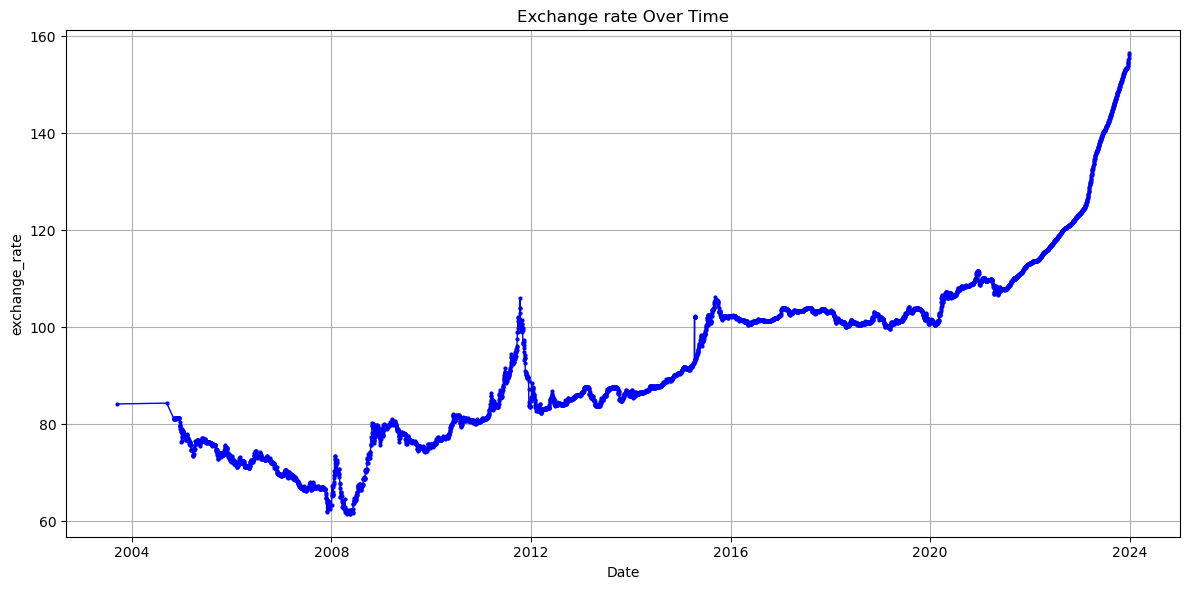

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['exchange_rate'], marker='o', color='blue', markersize=2, linewidth=1)
plt.title('Exchange rate Over Time')
plt.xlabel('Date')
plt.ylabel('exchange_rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Kenya's shilling has steadily weakened against the USD over 2004-2024 (e.g., from 75 to 150 KES/$).
Sharp drops likely occurred during 2008 (global crisis) and 2020 (COVID-19).
A weaker shilling raises import costs but helps exports and tourism.

## Interest rate

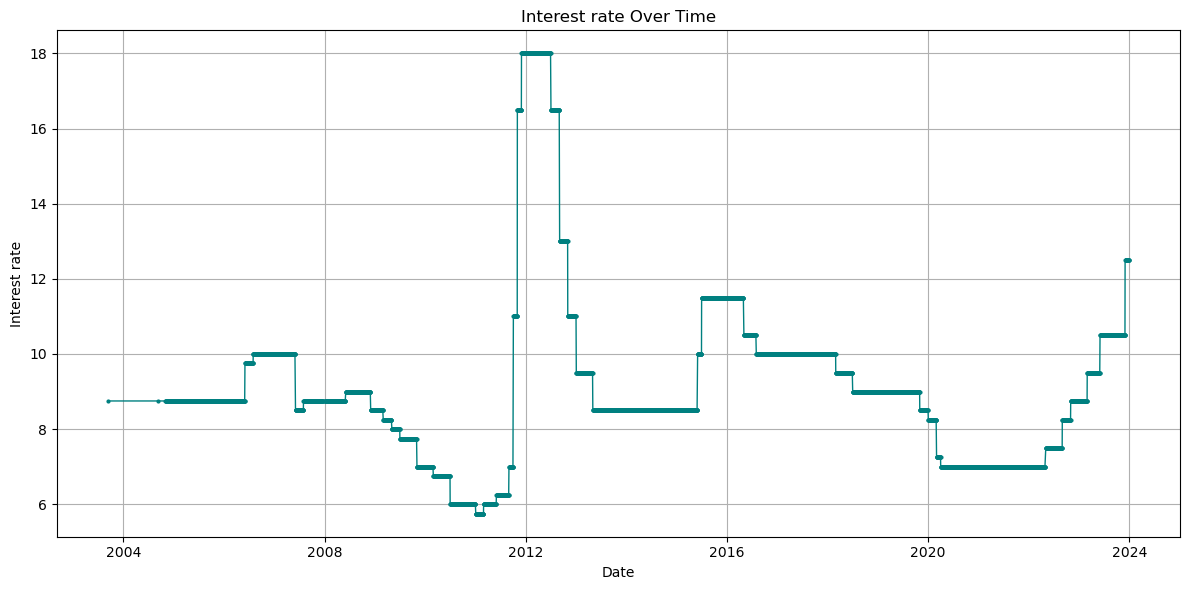

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Interest rate'], marker='o', color='teal', markersize=2, linewidth=1)
plt.title('Interest rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Interest rates dropped from ~16% (2004) to 6% (2024), showing a consistent 20 year decrease.
The biggest drop occurred between 2008-2012, likely due to post-crisis monetary policies.
Lower rates mean cheaper loans, but could signal a weaker economy needing help.

## Total Remittances vs Total Debt

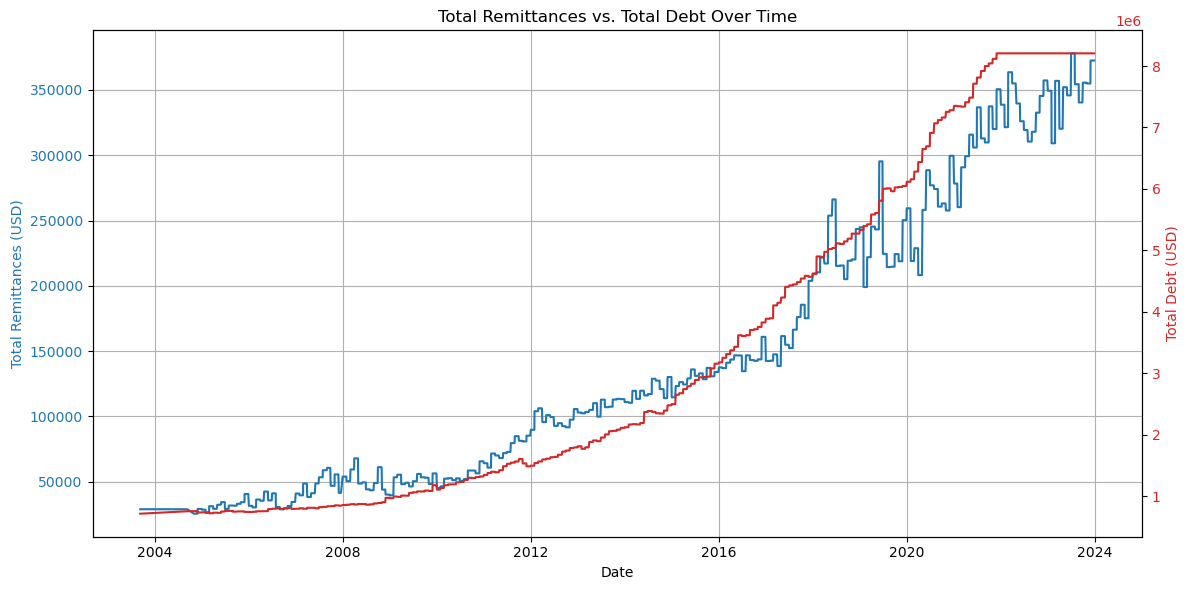

In [65]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df["Total Remittances"], color='tab:blue', label='Total Remittances')
ax1.set_ylabel("Total Remittances (USD)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df.index, df["Total Debt"], color='tab:red', label='Total Debt')
ax2.set_ylabel("Total Debt (USD)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.set_xlabel("Date")
plt.title("Total Remittances vs. Total Debt Over Time")

ax1.grid(True)
fig.tight_layout()

plt.show()

Remittances rose from 
20
K
(
2004
)
t
o
20K(2004)to150K (2020), showing steady growth.
Debt grew faster, jumping from 1 to 8 units in the same period.
Remittances help, but debt may be outpacing the financial benefits.

## Exchange_rate vs Exports

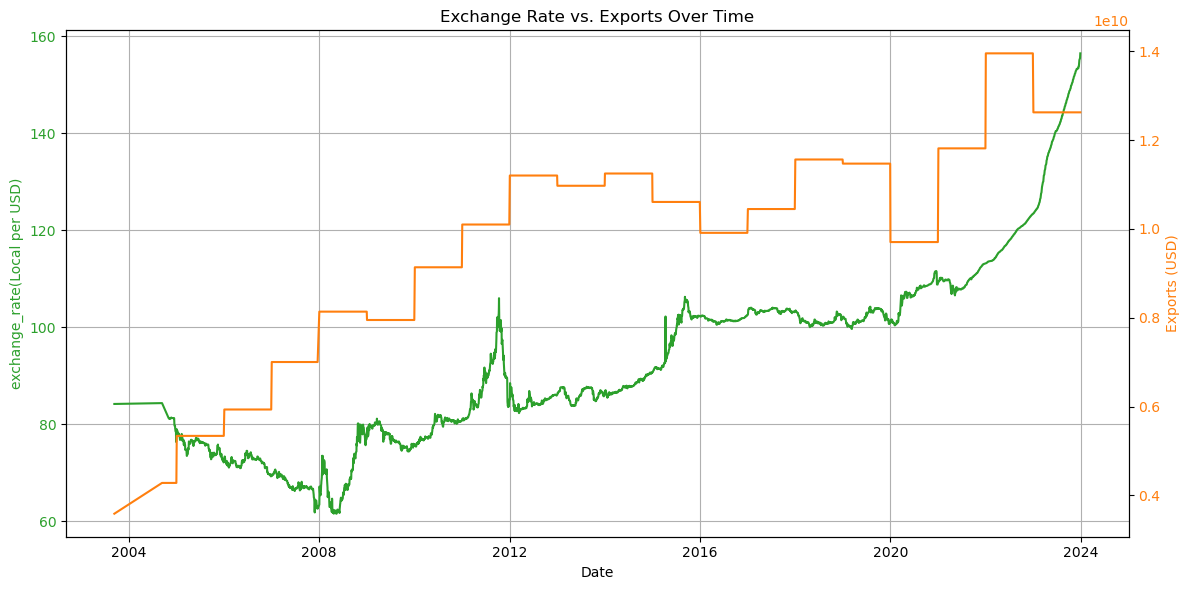

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df["exchange_rate"], color='tab:green', label='exchange_rate')
ax1.set_ylabel("exchange_rate(Local per USD)", color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx()
ax2.plot(df.index, df["Exports"], color='tab:orange', label='Exports')
ax2.set_ylabel("Exports (USD)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax1.set_xlabel("Date")
plt.title("Exchange Rate vs. Exports Over Time")
ax1.grid(True)
fig.tight_layout()

plt.show()

## Unemployment Rate vs Interest rate

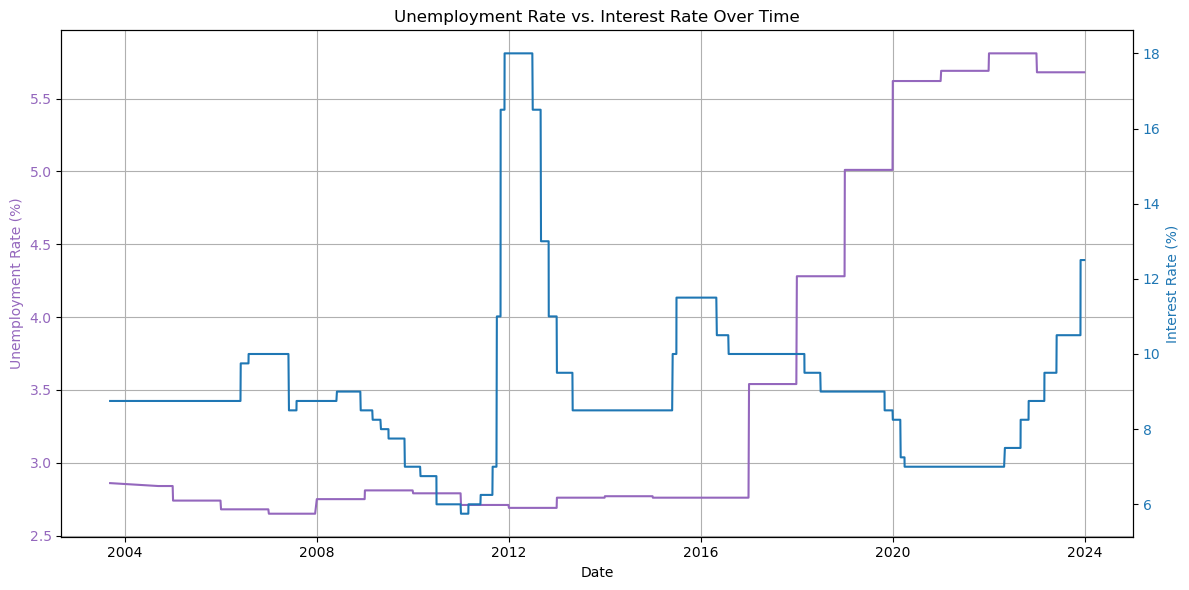

In [67]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df.index, df["Unemployment Rate"], color='tab:purple', label='Unemployment Rate')
ax1.set_ylabel("Unemployment Rate (%)", color='tab:purple')
ax1.tick_params(axis='y', labelcolor='tab:purple')

ax2 = ax1.twinx()
ax2.plot(df.index, df["Interest rate"], color='tab:blue', label='Interest rate')
ax2.set_ylabel("Interest Rate (%)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_xlabel("Date")
plt.title("Unemployment Rate vs. Interest Rate Over Time")
ax1.grid(True)
fig.tight_layout()

plt.show()

# Modeling

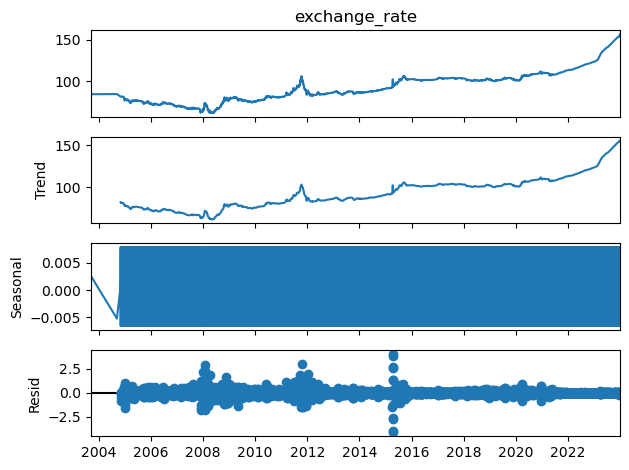

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

# You can change period to 7 for weekly seasonality or 30 for monthly seasonality in daily data
result = seasonal_decompose(df['exchange_rate'], model='additive', period=7)

# Plot the components
result.plot()
plt.tight_layout()
plt.show()

Trend:
Strong upward trend, especially post-2015 ,confirms non-stationarity, so differencing is needed in ARIMA.

Seasonality:
Nearly flat seasonal component,there is no significant seasonality, so SARIMA is not necessary.

Residuals (Noise):
Some volatility and outliers around known economic events (2008, 2014, 2016), but relatively stable after 2017 ,suitable for modeling.

In [75]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['exchange_rate'].dropna())
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

ADF Statistic: 2.5483
p-value: 0.9991


In [76]:
# First-order differencing
df['exchange_rate_diff'] = df['exchange_rate'].diff()

# Drop NaN introduced by differencing
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(df['exchange_rate_diff'].dropna())
print(f"ADF Statistic (1st diff): {result_diff[0]:.4f}")
print(f"p-value (1st diff): {result_diff[1]:.4f}")

ADF Statistic (1st diff): -12.0841
p-value (1st diff): 0.0000


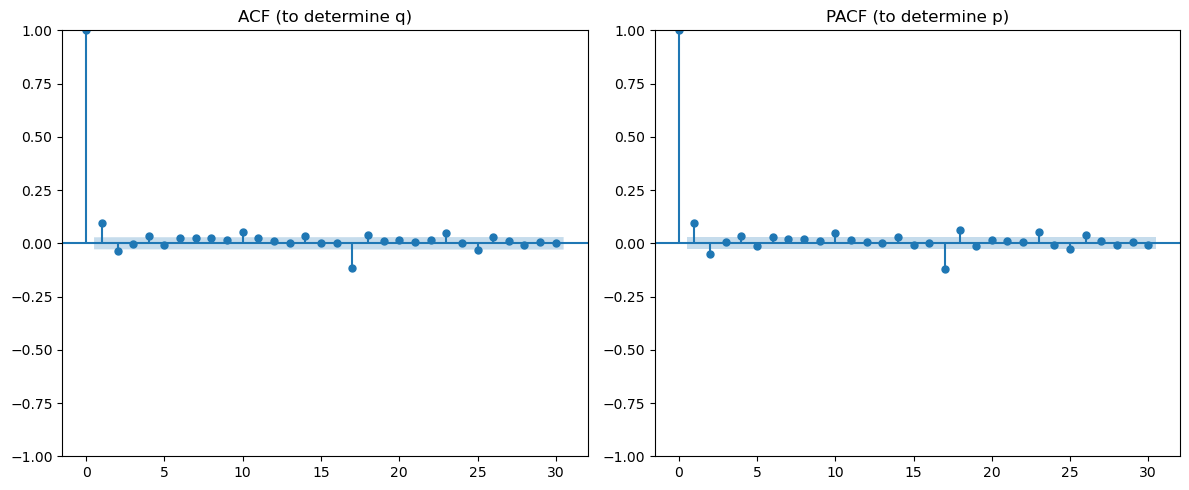

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df['exchange_rate_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("ACF (to determine q)")

plt.subplot(1, 2, 2)
plot_pacf(df['exchange_rate_diff'].dropna(), lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF (to determine p)")

plt.tight_layout()
plt.show()

In [78]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(df['exchange_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          exchange_rate   No. Observations:                 4808
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1911.029
Date:                Fri, 23 May 2025   AIC                           3828.058
Time:                        14:26:00   BIC                           3847.491
Sample:                             0   HQIC                          3834.883
                               - 4808                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2092      0.054     -3.861      0.000      -0.315      -0.103
ma.L1          0.3132      0.053      5.860      0.000       0.208       0.418
sigma2         0.1297      0.000    487.463      0.0

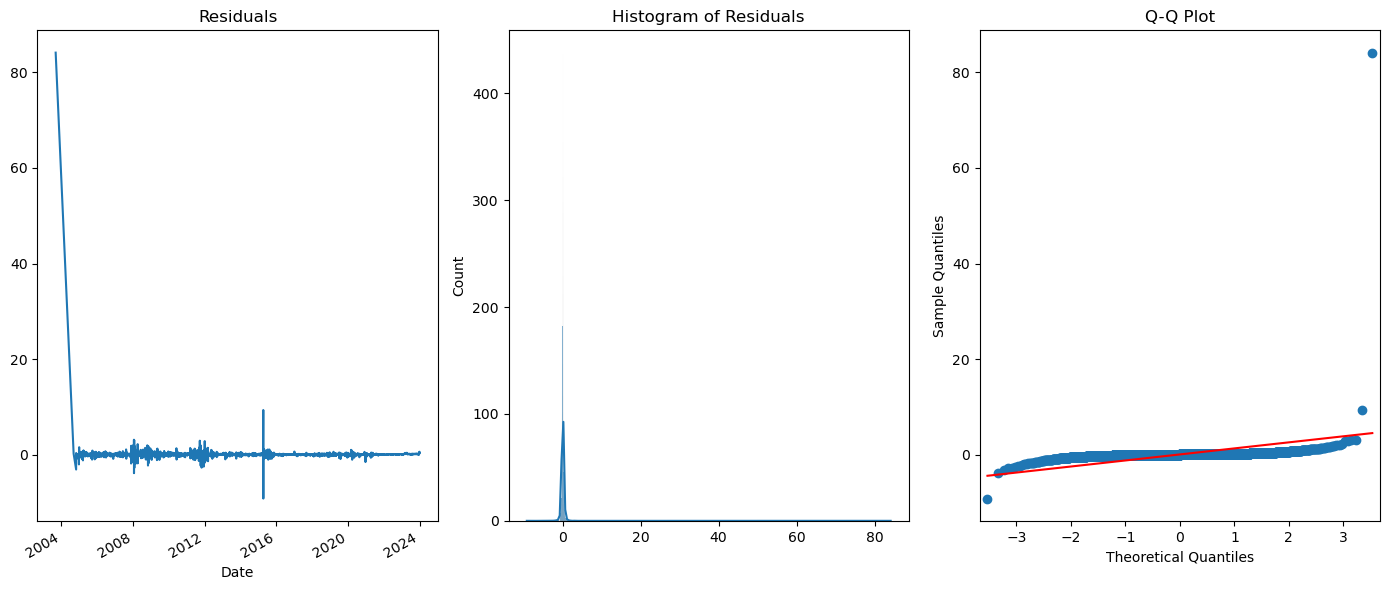

In [79]:
residuals = model_fit.resid

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
residuals.plot(title="Residuals")

plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")

plt.subplot(1, 3, 3)
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot")

plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


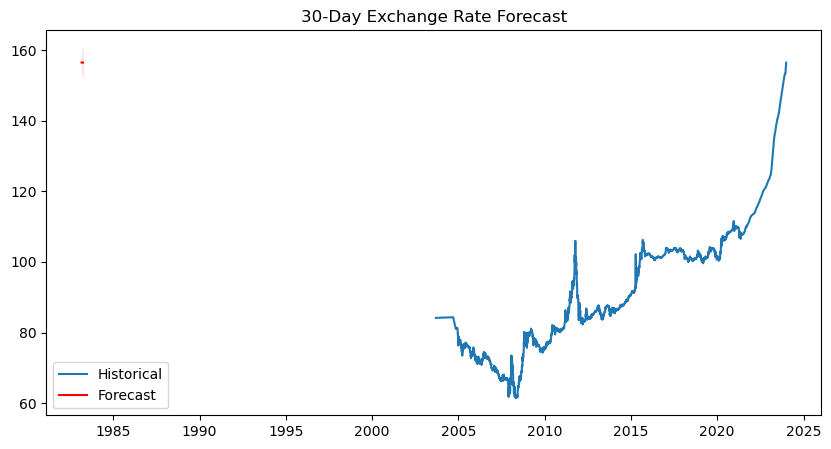

In [80]:
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

plt.figure(figsize=(10, 5))
plt.plot(df['exchange_rate'], label='Historical')
plt.plot(forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('30-Day Exchange Rate Forecast')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train = df['exchange_rate'][:-30]
test = df['exchange_rate'][-30:]  # This is your `actual`

# Refit model on train
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 30 steps
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

# Now compare forecast vs actual
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, forecast_df['mean'])
mae = mean_absolute_error(test, forecast_df['mean'])
6
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE: 3.9160
MAE: 1.6437


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
